In [1]:
import sqlite3
import pandas as pd
import numpy as np
from scipy import stats
import itertools
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import tweepy

In [2]:
# ambil data dari database
conn = sqlite3.connect('laksmanayudha22_final.db')
cursor = conn.cursor()

query = """ SELECT tweetid, cleantweet FROM tweet; """
cursor.execute(query)
conn.commit()
all_data = cursor.fetchall()

cursor.close()
conn.close()

# pisahkan tweetid dan clean tweet
clean_tweet = []
tweet_id = []
for data in all_data:
    clean_tweet.append(data[1])
    tweet_id.append(data[0])

# word tokenize
data = [word_tokenize(tweet) for tweet in clean_tweet]

# multidimensional ke single dimension
data = list(itertools.chain(*data))

In [121]:
fqdist = FreqDist(data)
print(fqdist.most_common(20))

[('omnibus', 1073), ('law', 1073), ('obl', 423), ('kerja', 360), ('uu', 330), ('cipta', 279), ('yg', 191), ('undang', 180), ('amp', 153), ('buruh', 143), ('indonesia', 139), ('investor', 125), ('usaha', 124), ('pulih', 112), ('birokrasi', 106), ('investasi', 96), ('percaya', 96), ('revolusi', 95), ('sah', 93), ('investasibukanancaman', 90)]


In [4]:
paragraf = ' '.join(data)
print(paragraf)

omnibus law llangkah terobos pilih perintah mudah cepat aneka program penting rakyat obl sah mafia merana ciptakerjauntukbangsa alas alas argumentasi masuk akal muka layak omnibus law laksana negeri obl sah mafia merana ciptakerjauntukbangsa kemnaker produktivitas indonesia tingkat omnibus law cipta kerja obl sah mafia merana ciptakerjauntukbangsa omnibus law dorong maju kembang investasi daerah obl sah mafia merana ciptakerjauntukbangsa viral sumut datang ksp kasak kusuk cari dukung ormas sumut jg indonesia utk omnibus law misi busuk yg telikung amanat rakyat dlm agam aksi indonesia tolak omnibus law pa212 didu omnibus law cipta kerja ciptaker tingkat serap tenaga kerja obl sah mafia merana ciptakerjauntukbangsa omnibus law tengara sederhana regulasi tumpang tindih protes mesti mafia perintah laku bijak obl sah mafia merana ciptakerjauntukbangsa baca kerap dalang tolak uu cipta kerja obl sah mafia merana ciptakerjauntukbangsa uu cipta kerja birokrasi sederhana kurang cegah korupsi obl

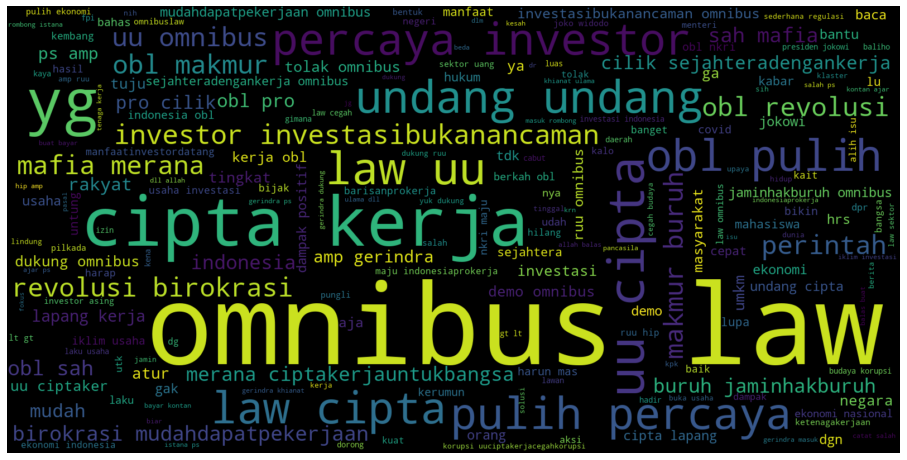

In [5]:
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(paragraf)
plt.figure(figsize=(16,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Sentiment Analisis

In [6]:
pos_list= open("./kata_positif.txt","r")
pos_kata = pos_list.readlines()
neg_list= open("./kata_negatif.txt","r")
neg_kata = neg_list.readlines()

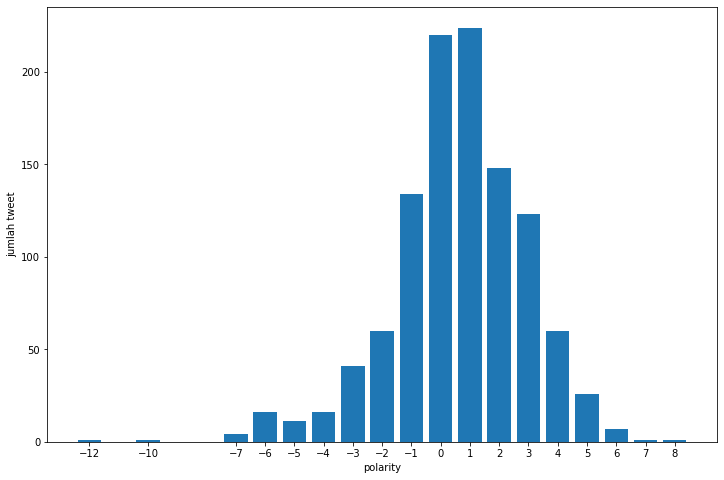

In [129]:
# loop kata pos neg
hasil = []
for tweet in clean_tweet:
    count_pos = 0
    count_neg = 0
    for kata_pos in pos_kata:
        if kata_pos.strip() in tweet:
            count_pos+=1
    for kata_neg in neg_kata:
        if kata_neg.strip() in tweet:
            count_neg+=1
    hasil.append(count_pos - count_neg)

labels, counts = np.unique(hasil, return_counts=True)
fig, ax = plt.subplots(figsize=[12,8])
ax.bar(labels, counts, align='center')
ax.set_xticks(labels)
ax.set_xlabel("polarity")
ax.set_ylabel("jumlah tweet")
plt.show()

In [8]:
# rata - rata sentimen
print("Hasil rata - rata sentiment : ",np.mean(hasil))

Hasil rata - rata sentiment :  0.6160877513711152


#### Ubah sentiment dengan rules:
- Total Nilai > 0, maka sentimen positif
- Total Nilai < 0, maka sentimen negatif
- Total Nilai = 0, maka sentimen netral

In [9]:
# ubah sentiment
sentiments = []
for h in hasil:
    if h > 0:
        sentiments.append(1)
    elif h < 0 :
        sentiments.append(0)
    else :
        sentiments.append(2)

In [10]:
# modus
modus = int(stats.mode(sentiments).mode[0])

In [11]:
# ubah nan dengan nilai modus
# for index, sentiment in enumerate(sentiments):
#     if np.isnan(sentiment):
#         sentiments[index] = modus

In [12]:
sentiments

[1,
 1,
 2,
 1,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 1,
 1,
 2,
 0,
 2,
 1,
 1,
 0,
 0,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 0,
 1,
 1,
 2,
 0,
 2,
 1,
 2,
 0,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 0,
 0,
 1,
 2,
 0,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 0,
 1,
 0,
 0,
 2,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 2,
 1,
 0,
 1,
 2,
 2,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 2,
 1,
 2,
 1,
 0,
 1,
 0,
 2,
 2,
 0,
 1,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 2,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 2,
 1,
 0,
 1,
 2,
 0,
 0,
 1,
 0,
 2,
 0,
 2,
 2,
 0,
 1,
 2,
 2,
 1,
 0,
 1,
 2,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 2,
 2,
 2,
 2,
 1,
 2,
 0,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [13]:
# insert ke database
conn = sqlite3.connect('laksmanayudha22_final.db')
cursor = conn.cursor()

insert = list(zip(tweet_id, sentiments))
query = """INSERT INTO sentiment VALUES (?, ?);"""
cursor.executemany(query, insert)
conn.commit()

cursor.close()
conn.close()

In [14]:
# ambil data
conn = sqlite3.connect('laksmanayudha22_final.db')
cursor = conn.cursor()

query = """ SELECT * FROM tweet INNER JOIN sentiment using(tweetid) """
cursor.execute(query)
conn.commit()
tweets = cursor.fetchall()
names = [description[0] for description in cursor.description]

cursor.close()
conn.close()

In [15]:
# lihat data
df = pd.DataFrame(tweets, columns=names)
expt = ['createddate', 'scraping_id', 'tweet']
columns = [col for col in names if col not in expt]

In [16]:
df = df[columns]
df.head()

,tweetid,userid,cleantweet,sentiment
0,1329199264187121664,1890250892,omnibus law llangkah terobos pilih perintah mu...,1
1,1329199301700972544,1319493143654354944,alas alas argumentasi masuk akal muka layak om...,1
2,1329199313650475008,1329000419817709574,kemnaker produktivitas indonesia tingkat omnib...,2
3,1329199697643282433,1324197955411144705,omnibus law dorong maju kembang investasi daer...,1
4,1329199884356841472,823369667641122820,viral sumut datang ksp kasak kusuk cari dukung...,0


In [35]:
df_replace = df.replace({'sentiment':{1:'positif', 0:'negatif', 2:'netral'}})
display(df_replace)

,tweetid,userid,cleantweet,sentiment
0,1329199264187121664,1890250892,omnibus law llangkah terobos pilih perintah mu...,positif
1,1329199301700972544,1319493143654354944,alas alas argumentasi masuk akal muka layak om...,positif
2,1329199313650475008,1329000419817709574,kemnaker produktivitas indonesia tingkat omnib...,netral
3,1329199697643282433,1324197955411144705,omnibus law dorong maju kembang investasi daer...,positif
4,1329199884356841472,823369667641122820,viral sumut datang ksp kasak kusuk cari dukung...,negatif
...,...,...,...,...
1089,1332671686127149058,1324555885163634693,tolak omnibus law,netral
1090,1332672865884246035,224972908,perintah termehek mehek kritik warga ombinus l...,negatif
1091,1332672912747356161,135795460,undang undang cipta kerja omnibus law tuai kon...,netral
1092,1332676075848044545,1222772135518593025,langkah omnibus law,netral


Text(0, 0.5, 'Tingkat Persentase')

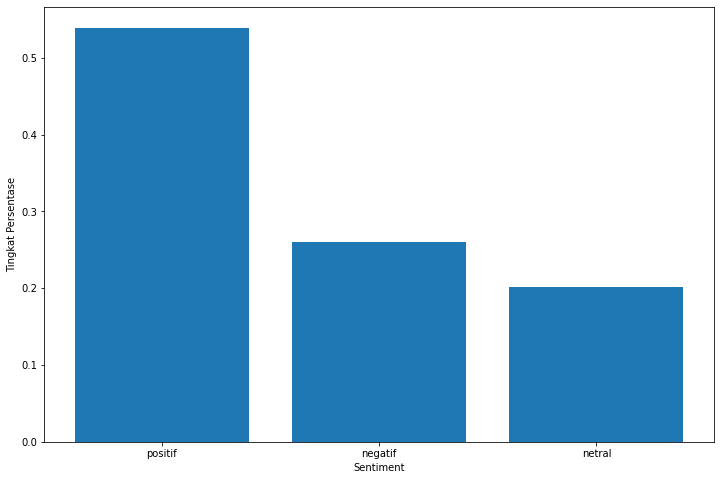

In [18]:
# bar plot
data_plot = df_replace['sentiment'].value_counts(normalize=True)
label = data_plot.index
freq = data_plot.values

# plot data
fig, ax = plt.subplots(figsize=[12, 8])
ax.bar(label, freq)

#set label
ax.set_xlabel('Sentiment')
ax.set_ylabel('Tingkat Persentase')

In [19]:
data_plot

positif    0.539305
negatif    0.259598
netral     0.201097
Name: sentiment, dtype: float64

In [20]:
# mengisi nilai nan dengan modus
# df['sentiment'] = df['sentiment'].fillna(modus)

In [21]:
df

,tweetid,userid,cleantweet,sentiment
0,1329199264187121664,1890250892,omnibus law llangkah terobos pilih perintah mu...,1
1,1329199301700972544,1319493143654354944,alas alas argumentasi masuk akal muka layak om...,1
2,1329199313650475008,1329000419817709574,kemnaker produktivitas indonesia tingkat omnib...,2
3,1329199697643282433,1324197955411144705,omnibus law dorong maju kembang investasi daer...,1
4,1329199884356841472,823369667641122820,viral sumut datang ksp kasak kusuk cari dukung...,0
...,...,...,...,...
1089,1332671686127149058,1324555885163634693,tolak omnibus law,2
1090,1332672865884246035,224972908,perintah termehek mehek kritik warga ombinus l...,0
1091,1332672912747356161,135795460,undang undang cipta kerja omnibus law tuai kon...,2
1092,1332676075848044545,1222772135518593025,langkah omnibus law,2


# Analisis Sentimen Dengan Naive Bayes

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [23]:
vectorizer = TfidfVectorizer (max_features=2500)
x = vectorizer.fit_transform(df['cleantweet']).toarray()

# pisahkan data feature dan target
y = df.iloc[:,-1]

# bagi dat train dan test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=15)

In [24]:
# prediksi
model_g = GaussianNB()
model_g.fit(X_train,y_train)

y_preds = model_g.predict(X_test)
print(confusion_matrix(y_test,y_preds))
print(classification_report(y_test,y_preds))
print('nilai akurasinya adalah ',accuracy_score(y_test, y_preds))

[[43  9  8]
 [ 8 69 37]
 [13 13 19]]
              precision    recall  f1-score   support

           0       0.67      0.72      0.69        60
           1       0.76      0.61      0.67       114
           2       0.30      0.42      0.35        45

    accuracy                           0.60       219
   macro avg       0.58      0.58      0.57       219
weighted avg       0.64      0.60      0.61       219

nilai akurasinya adalah  0.5981735159817352


# Analisis Sentimen Dengan SVM

In [25]:
# prediksi
model_s = svm.SVC(kernel='linear')
model_s.fit(X_train,y_train)

y_preds = model_s.predict(X_test)
print(confusion_matrix(y_test,y_preds))
print(classification_report(y_test,y_preds))
print('nilai akurasinya adalah ',accuracy_score(y_test, y_preds))

[[ 45  11   4]
 [  7 102   5]
 [ 19  14  12]]
              precision    recall  f1-score   support

           0       0.63      0.75      0.69        60
           1       0.80      0.89      0.85       114
           2       0.57      0.27      0.36        45

    accuracy                           0.73       219
   macro avg       0.67      0.64      0.63       219
weighted avg       0.71      0.73      0.70       219

nilai akurasinya adalah  0.726027397260274


# Analisis Sentimen Dengan KNN

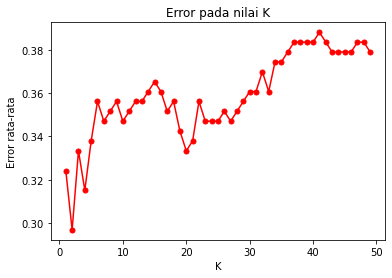

In [26]:
# menentukan K

error = []
for i in range(1, 50):
    model_k = KNeighborsClassifier(n_neighbors=i)
    model_k.fit(X_train,y_train)
    y_pred = model_k.predict(X_test)
    error.append(np.mean(y_pred != y_test))

plt.figure(1)  
plt.plot(range(1, 50), error, color='red', marker='o', markersize=5)
plt.title('Error pada nilai K')  
plt.xlabel('K')  
plt.ylabel('Error rata-rata')
plt.show()

In [34]:
# prediksi
# error terkecil ada di n = 2

model_k = KNeighborsClassifier(n_neighbors=2)
model_k.fit(X_train,y_train)

y_preds = model_k.predict(X_test)
print(confusion_matrix(y_test,y_preds))
print(classification_report(y_test,y_preds))
print('nilai akurasinya adalah ',accuracy_score(y_test, y_preds))

[[42 14  4]
 [14 95  5]
 [16 12 17]]
              precision    recall  f1-score   support

           0       0.58      0.70      0.64        60
           1       0.79      0.83      0.81       114
           2       0.65      0.38      0.48        45

    accuracy                           0.70       219
   macro avg       0.67      0.64      0.64       219
weighted avg       0.70      0.70      0.69       219

nilai akurasinya adalah  0.7031963470319634


## Analisi sentiment tweet 29 November 2020 dengan Metode SVM

In [131]:
from laksmanayudha22_tugas13 import DataHandler, query, database, jumlah_tweet, twitter_api

In [132]:
data_handler = DataHandler(database)
DataHandler.date_since = "2020-11-29"
data_handler.get_data(twitter_api, query, jumlah_tweet)
data_handler.save_sql()
data_handler.clean_data()

83
(1332899505285464064, 2327142323, datetime.datetime(2020, 11, 29, 4, 9, 40), '@MaspiyuO FPI HRS akan terus dimainkan sampe lebaran kodok, Harun Masiku pilkada solo,medan,omnibus law dibuat senyap\nItulah strategi mereka..umat islam hanya dibuat lelah u/ hal yg remeh melupakan hal yg mengancam ibu pertiwi Indonesia', 12)
(1332897475506573313, 34565583, datetime.datetime(2020, 11, 29, 4, 1, 36), '@Kabar_FPI pantesan beliau diincer dicari2 kesalahannya... pemilik omnibus law gerah', 12)
(1332892883964162048, 1292837130624851970, datetime.datetime(2020, 11, 29, 3, 43, 22), 'Manfaat omnibus law bagi UMKM\n\n#Omnibuslaw https://t.co/PGYb8GPTml', 12)
(1332891768552005634, 1412074356, datetime.datetime(2020, 11, 29, 3, 38, 56), 'Topik Pembahasan #MunasTarjih Online\n1. Fikih Zakat Kontemprer\n2. Fikih Difabel\n3. Fikih Agraria\n4. Risalah Akhlak Islam\n5. Euthanasia \n6. Pengempanan dan Penyempurnaan HPT\n\nPaling menarik adalah isu agraria, relate banget dgn isu Omnibus Law yang sejak awal

In [133]:
# ambil data
conn = sqlite3.connect('laksmanayudha22_final.db')
cursor = conn.cursor()

query = """ SELECT cleantweet FROM tweet WHERE createddate > '2020-11-29'; """
cursor.execute(query)
conn.commit()
data29 = cursor.fetchall()

cursor.close()
conn.close()

In [134]:
data29

[('omnibus law mudah laku usaha izin obl cipta rakyat lingkunganterjamin',),
 ('obl cipta rakyat lingkunganterjamin uu omnibus law mantap kih',),
 ('aliansi pemuda sulut dukung omnibus law uu cipta kerja obl cipta rakyat lingkunganterjamin',),
 ('aliansi pemuda sulut dukung omnibus law uu cipta kerja obl cipta rakyat lingkunganterjamin',),
 ('aliansi pemuda sulut dukung omnibus law uu cipta kerja obl cipta rakyat lingkunganterjamin',),
 ('analisis dampak lingkung hapus omnibus law atur pasti hukumnnya obl cipta rakyat lingkunganterjamin',),
 ('omnibus law usaha komitmen presiden joko widodo benah lingkung hidup tingkat kualitas kapasitas industri indonesia obl cipta rakyat lingkunganterjamin',),
 ('amdal hilang omnibus law kuat dorong ekonomi daerah obl cipta rakyat lingkunganterjamin',),
 ('rigid siti garansi omnibus law cipta kerja wujud sejahtera rakyat obl cipta rakyat lingkunganterjamin',),
 ('ruu omnibus law tega hukum lingkung laku jahat lingkung hukum obl cipta rakyat lingkunga

In [135]:
# multidimensional ke single dimension
data29 = list(itertools.chain(*data29))

In [136]:
# ML
vectorizer = TfidfVectorizer (max_features=320)
x = vectorizer.fit_transform(df['cleantweet']).toarray()

# pisahkan data feature dan target
y = df.iloc[:,-1]

# data test
x_test = vectorizer.fit_transform(pd.Series(data29)).toarray()

In [137]:
x_test

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.33426747, 0.        ,
        0.        ]])

In [138]:
# prediksi
model_s = svm.SVC(kernel='linear')
model_s.fit(x,y)

y_preds = model_s.predict(x_test)

In [139]:
dff = pd.Series(y_preds)
len(dff)

106

In [140]:
dff = dff.replace({1:'positif', 0:'negatif', 2:'netral'})
dff.value_counts(normalize=True)

positif    0.783019
negatif    0.122642
netral     0.094340
dtype: float64

Text(0, 0.5, 'Tingkat Persentase')

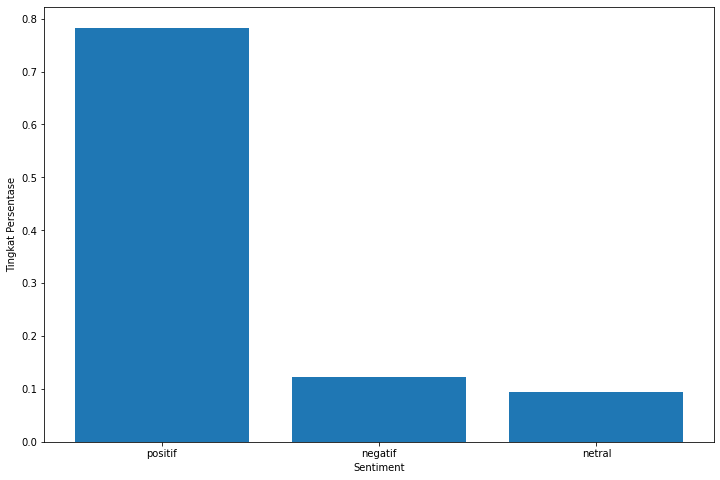

In [141]:
# bar plot
data_plot = dff.value_counts(normalize=True)
label = data_plot.index
freq = data_plot.values

# plot data
fig, ax = plt.subplots(figsize=[12, 8])
ax.bar(label, freq)

#set label
ax.set_xlabel('Sentiment')
ax.set_ylabel('Tingkat Persentase')